# **Atividade 3 - KNN E MLP**


# **BIBLIOTECAS**


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
import seaborn as sns
import pylab as pl
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

#**Função acurácia**

In [ ]:
def f_acuracia(y_true, y_predict):
  y_true_size = y_true.shape[0]
  media_das_acuracia = (np.sum(y_true == y_predict) / y_true_size)
  return media_das_acuracia

#**Matriz de Confusão**

In [ ]:
def plot_confusion_matrix_(x, y, classificador):
    y_test_predict = classificador.predict(x)

    cm = confusion_matrix(y ,y_test_predict)
    
    index = ["x1", "x2"]
    columns = ["x1", "x2"]

    cm_df = pd.DataFrame(cm, columns, index)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm_df, annot=True, cmap=plt.cm.Greens)
    
    plt.show()

#**Fronteiras de Separação do Classificador**

In [ ]:
 def plot_boundaries(x, y, classificador):
      
      x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
      y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
      h = 0.6

      xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
      Z = classificador.predict(np.c_[xx.ravel(), yy.ravel()])
      
      Z = Z.reshape(xx.shape)
      plt.figure(1, figsize=(4, 3))
      plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
      
      plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
      plt.xlabel('x1')
      plt.ylabel('x2')

      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())
      plt.xticks(())
      plt.yticks(())

      plt.show()
    

#**K-Fould**

In [ ]:

def k_fold(x, y, k, classificador):
  indices = np.arange(x.shape[0])
  np.random.shuffle(indices)
  
  #DEFININDOP OS INDICES
  x = x[indices]
  y = y[indices]

  #TAMANHO DAS ENTRADAS
  x_size = x.shape[0]
  y_size = y.shape[0]

  #o tamanho de cada subset da nossa lista de índices
  size = len(indices)
  subset_size = round(x_size / k)

  x_subsets = [x[i:i + subset_size, :] for i in range(0, x_size, subset_size)]
  y_subsets = [y[i:i + subset_size] for i in range(0, y_size, subset_size)]

  #GUARDAR OS VALORES DE ACURACIA DE CADA EVENTO
  lista_train = []
  lista_test = []

  for i in range(k):

      #definindo os valores de subset para lista
      x_test = x_subsets[i]
      y_test = y_subsets[i]

      #lista em que cada elemento dela será um dos subsets da lista indices.
      x_train = np.array([])
      y_train = np.array([])
     
     #dividindo os dados para criar k folds
      for j in range(k):
          if i != j:
              x_train = np.append(x_train, x_subsets[j])
              
              y_train = np.append(y_train, y_subsets[j])
          x_train = x_train.reshape(y_train.shape[0], x.shape[1])

      #Treinando e Predizendo os valores
      classificador.fit(x_train, y_train)
      y_test_pred = classificador.predict(x_test)
      y_train_pred = classificador.predict(x_train)

      #Calculando as Acurácias 
      acuracia_test =  f_acuracia(y_test, y_test_pred)
      acuracia_train = f_acuracia(y_train, y_train_pred)

      #Guardando os valores das Acurácias para fazer a média.
      lista_train = np.append(lista_train , acuracia_train)
      lista_test =  np.append(lista_test  , acuracia_test)

      print("---------------- - UTILIZANDO K-FOLD - ----------------")
      print("----------------- {}º INTERAÇÃO -----------------".format(i+1))
      print('ACURACIA DE TREINO: {}'.format(acuracia_train))
      print('ACURACIA DE TESTE: {}'.format(acuracia_test))
      print("----------------- MATRIZ DE CONFUSÃO ({}) -----------------".format(i+1))
      plot_confusion_matrix_(x_test, y_test, classificador)
  print('\n')
  print("----------------- ACURACIA GERAL -----------------")
  print('ACURACIA GERAL DE TREINO: {}'.format(lista_train.mean()))
  print('ACURACIA GERAL DE TESTE: {}'.format(lista_test.mean()))







#**KNN Classificação** 




In [ ]:
 class KNN(): 
  def __init__(self, k):
    self._estimator_type = "classifier"
    self.k = k

  def euclidiana_dist (self,x,y):
    x_ = (x - y) ** 2
    return np.sqrt(np.sum(x_, axis=1))  

  def fit(self, x, y):
    self.x = x
    self.y = y

  def predict(self, x_test):
    x_train = self.x
    y_train = self.y
    x_test = x_test
    
  
    size_x_train = x_train.shape
    size_y_train = y_train.shape
    size_x_test = x_test.shape

    euclidean_pred = []

    for i in range(size_x_test[0]):

      dist_euc = self.euclidiana_dist(x_train, x_test[i])
      #print(dist_euc)
      idx_sort = np.argsort(dist_euc)     
      idx_KNN = idx_sort[:k]

      count = np.bincount(np.int64(y_train[idx_KNN]))        
      euclidean_pred.append(np.argmax(count))
        
    return np.array(euclidean_pred)
    
    
    


#**MLP**

In [ ]:
class MLP():
    
    def __init__(self, camada, epoca, taxa_aprendizagem):
        self._estimator_type = "classifier"
        self.camada = camada
        self.epoca = epoca
        self.taxa_aprendizagem = taxa_aprendizagem

    def f_ativacao(self, X):
        ativacao =  1.0 / (1 + np.exp(-1 * X))
        return ativacao

    def f_ativacao_derivada(self, x):
        f_ativacao = self.f_ativacao(x)
        ativacao_derivada = f_ativacao * (1 - f_ativacao)
        return ativacao_derivada

    #ATUALIZANDO OS PESOS
    def att_pesos(self, X, y):
        #Definindo o novo valor predito
        y_pred = self.predict(X[:, 1:])
        
        #Calculando o erro
        erro = y - y_pred

        carregando_peso = []
        #definindo o valor de saida u
        for i in self.u_saida:
            carregando_peso = np.append(carregando_peso, self.f_ativacao_derivada(i))

        delta_k = erro * carregando_peso 

        carregando_peso = []
        for j in self.u_hidden:
            for i in j:
                carregando_peso = np.append(carregando_peso, self.f_ativacao_derivada(i))
        carregando_peso = carregando_peso.reshape(self.u_hidden.shape)

        delta_i = []
        for i in range(X.shape[0]):
            delta_i = np.append(delta_i, carregando_peso[i] * (delta_k[i] * self.m).sum())
        delta_i = delta_i.reshape(X.shape[0], self.camada)
                 
        self.m = self.m + (self.taxa_aprendizagem * np.matmul(delta_k.T, self.z))
        self.w = self.w + (self.taxa_aprendizagem * np.matmul(delta_i.T, X))
    
    def fit(self, x, y):
        bias = -1 * np.ones((x.shape[0],1))
        x = np.hstack((bias,x))

        self.w = np.random.rand(self.camada, x.shape[1])
        self.m = np.random.rand(1, self.camada +1)

        for _ in range(self.epoca):
            self.att_pesos(x, y)

    def predict(self, x_test):
        bias = -1 * np.ones((x_test.shape[0],1))
        x_test = np.hstack((bias,x_test))

        self.u_hidden = np.matmul(x_test, self.w.T)

        self.z = []
        for j in self.u_hidden:
            for i in j:
                result = self.f_ativacao(i)
                self.z = np.append(self.z, result)
        
        self.z = self.z.reshape(self.u_hidden.shape)
        self.z = np.hstack((bias, self.z))

        self.u_saida = np.matmul(self.z,self.m.T)

        self.y_pred = np.array([])
        for value in self.u_saida:
            result = self.f_ativacao(value)
            if result > 0.5:
                self.y_pred = np.append(self.y_pred, 1)
            else:
                self.y_pred = np.append(self.y_pred, 0)
        return self.y_pred



#**Carregando Dados**

In [ ]:
data = np.loadtxt("Dados/data2.txt", delimiter=",")
x = data[:, 0:2]
y = data[:, 2]
#emabaralha os dados
np.random.shuffle(data) 

#percentual = int(x.shape[0]*0.7) # 70% dos valores de amostra de x
#x_train	= x[:percentual] #pegando 70% dos valores de amostra de x (FIT)
#y_train	= y[:percentual] #pegando 70% dos valores de amostra de y (FIT)
#x_teste = x[percentual:] #pegando 30% dos valores de amostra de x (PREDICT)
#y_teste = y[percentual:] #pegando 30% dos valores de amostra de y (PREDICT)

#sdt = StandardScaler()
#x_train_std = sdt.fit_transform(x_train)
#x_test_std  = sdt.transform(x_teste)
#print("Valor", x_train)

#KNN = KNN()
#MLP = MLP(epoca=1500, taxa_aprendizagem= 0.0001, camada = 5)

#MLP.fit(x_train_std, y_train)
#y_test_predict = MLP.predict(x_test_std)
#print("Teste", y_test_predict)

#KNN.fit(x_train_std, y_train, k)
#y_test_predict = KNN.predict(x_test_std)
#print("Teste", y_test_predict)





#**RESULTADOS**


---------------- - UTILIZANDO KNN - ----------------


---------------- - UTILIZANDO K-FOLD - ----------------
----------------- 1º INTERAÇÃO -----------------
ACURACIA DE TREINO: 0.925
ACURACIA DE TESTE: 0.85
----------------- MATRIZ DE CONFUSÃO (1) -----------------


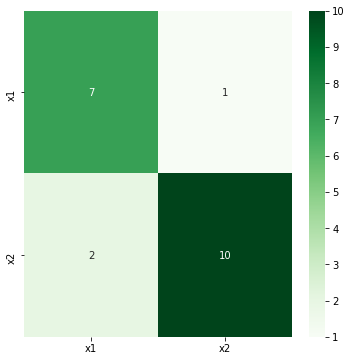

---------------- - UTILIZANDO K-FOLD - ----------------
----------------- 2º INTERAÇÃO -----------------
ACURACIA DE TREINO: 0.925
ACURACIA DE TESTE: 0.85
----------------- MATRIZ DE CONFUSÃO (2) -----------------


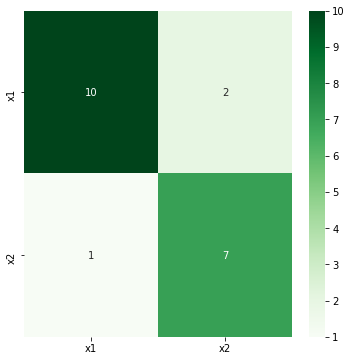

---------------- - UTILIZANDO K-FOLD - ----------------
----------------- 3º INTERAÇÃO -----------------
ACURACIA DE TREINO: 0.9
ACURACIA DE TESTE: 0.9
----------------- MATRIZ DE CONFUSÃO (3) -----------------


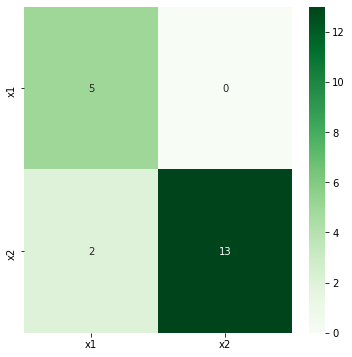

---------------- - UTILIZANDO K-FOLD - ----------------
----------------- 4º INTERAÇÃO -----------------
ACURACIA DE TREINO: 0.925
ACURACIA DE TESTE: 0.9
----------------- MATRIZ DE CONFUSÃO (4) -----------------


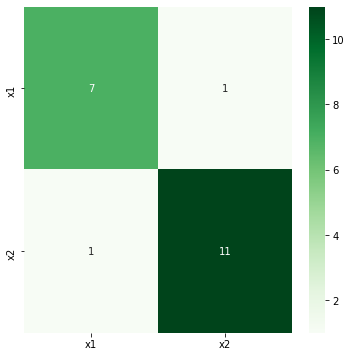

---------------- - UTILIZANDO K-FOLD - ----------------
----------------- 5º INTERAÇÃO -----------------
ACURACIA DE TREINO: 0.9
ACURACIA DE TESTE: 0.95
----------------- MATRIZ DE CONFUSÃO (5) -----------------


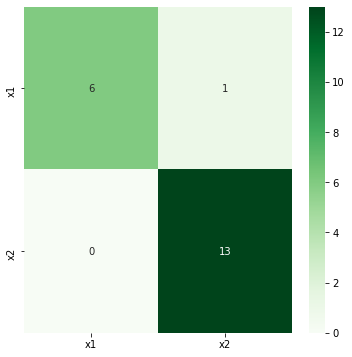



----------------- ACURACIA GERAL -----------------
ACURACIA GERAL DE TREINO: 0.915
ACURACIA GERAL DE TESTE: 0.89
      -Fronteiras de Separação do Classificador-


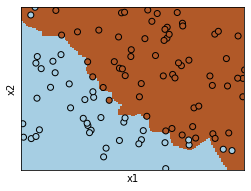

---------------- - UTILIZANDO MLP - ----------------


---------------- - UTILIZANDO K-FOLD - ----------------
----------------- 1º INTERAÇÃO -----------------
ACURACIA DE TREINO: 0.625
ACURACIA DE TESTE: 0.5
----------------- MATRIZ DE CONFUSÃO (1) -----------------


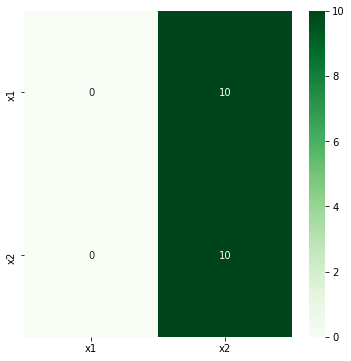

---------------- - UTILIZANDO K-FOLD - ----------------
----------------- 2º INTERAÇÃO -----------------
ACURACIA DE TREINO: 0.575
ACURACIA DE TESTE: 0.7
----------------- MATRIZ DE CONFUSÃO (2) -----------------


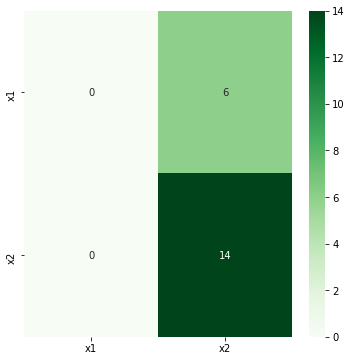

---------------- - UTILIZANDO K-FOLD - ----------------
----------------- 3º INTERAÇÃO -----------------
ACURACIA DE TREINO: 0.6
ACURACIA DE TESTE: 0.6
----------------- MATRIZ DE CONFUSÃO (3) -----------------


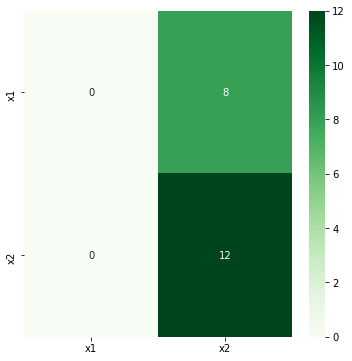

---------------- - UTILIZANDO K-FOLD - ----------------
----------------- 4º INTERAÇÃO -----------------
ACURACIA DE TREINO: 0.3875
ACURACIA DE TESTE: 0.45
----------------- MATRIZ DE CONFUSÃO (4) -----------------


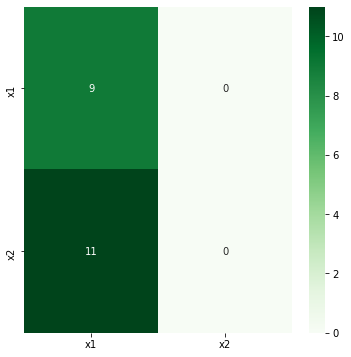

---------------- - UTILIZANDO K-FOLD - ----------------
----------------- 5º INTERAÇÃO -----------------
ACURACIA DE TREINO: 0.5875
ACURACIA DE TESTE: 0.65
----------------- MATRIZ DE CONFUSÃO (5) -----------------


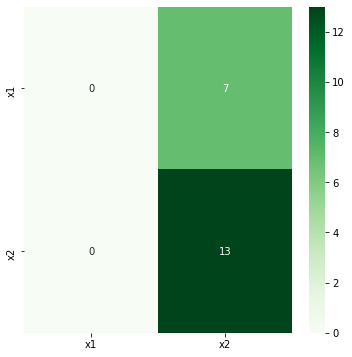



----------------- ACURACIA GERAL -----------------
ACURACIA GERAL DE TREINO: 0.5549999999999999
ACURACIA GERAL DE TESTE: 0.58
      -Fronteiras de Separação do Classificador-


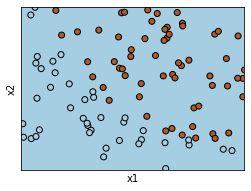

In [ ]:
print("---------------- - UTILIZANDO KNN - ----------------")
print('\n')
k = 5
KNN = KNN(k = k)
k_fold(x, y, 5, KNN)
print("      -Fronteiras de Separação do Classificador-")
plot_boundaries(x, y, KNN)
print('\n')

print("---------------- - UTILIZANDO MLP - ----------------")
print('\n')
MLP = MLP(epoca=1000, taxa_aprendizagem= 0.001, camada = 5)
k_fold(x, y, 5, MLP)
print("      -Fronteiras de Separação do Classificador-")
plot_boundaries(x, y, MLP)